In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['xAPI-Edu-Data.csv']


In [2]:
student_data = pd.read_csv("../input/xAPI-Edu-Data.csv")

In [3]:
student_data.shape

(480, 17)

In [4]:
student_data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
print("Any data missing or having a null value?:",student_data.isnull().sum().any())

Any data missing or having a null value?: False


In [6]:
print("Unique values in each column\n")
print(student_data.nunique())

Unique values in each column

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64


The below plot shows the percentage of boy and girls.
Looks like more boys are close to twice as much as girls

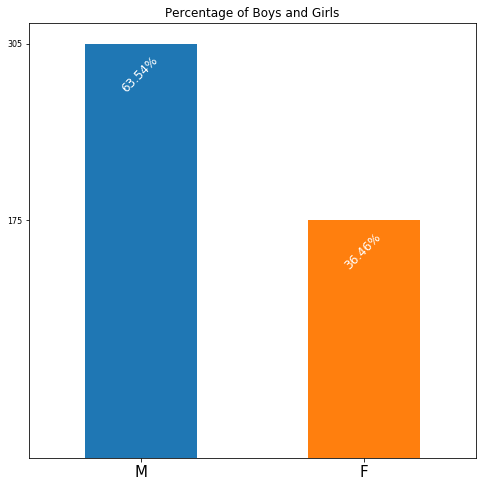

In [7]:
ax = student_data['gender'].value_counts().plot(kind='bar', figsize=(8,8),
                                                   fontsize=8)

ax.set_ylabel("")
ax.set_yticks([sum(student_data['gender']=='M'),sum(student_data['gender']=='F')])
ax.set_xticklabels(["M","F"], rotation=0, fontsize=15)
ax.set_title("Percentage of Boys and Girls")

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()-15,str(round((i.get_height()/total)*100, 2))+'%', rotation=45,fontsize=12,color='white')


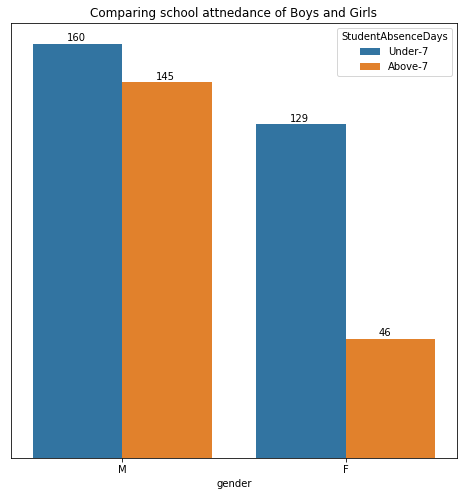

In [8]:
plt.figure(figsize=(8,8))
plt.title("Comparing school attnedance of Boys and Girls")
bar = sns.countplot(hue='StudentAbsenceDays',x='gender',data=student_data)
plt.yticks([])
plt.ylabel("")
for p in bar.patches:
    bar.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))

Lets regroup the students on their marks/grades - 
From the data set information it's clear that 

Low-Level: interval includes values from 0 to 69,
Middle-Level: interval includes values from 70 to 89,
High-Level: interval includes values from 90-100.

So we could classify that Low-level could be fail and middle and high-level as pass

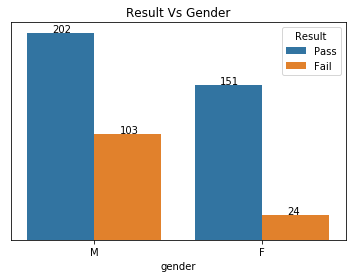

In [9]:
result=[]
for k in student_data['Class']:
    if k in ['L']:
        result.append('Fail')
    else:
        result.append('Pass')

student_data['Result'] = result

#student_data = student_data.drop('Class',axis=1)

bar = sns.countplot(hue='Result',x='gender',data=student_data)
plt.title("Result Vs Gender")    
plt.ylabel("")
plt.yticks([])

for p in bar.patches:
    bar.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))


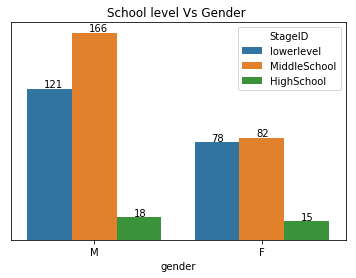

In [10]:
plt.title("School level Vs Gender ")
bar = sns.countplot(hue='StageID',x='gender',data=student_data)
plt.ylabel("")
plt.yticks([])
for p in bar.patches:
    bar.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+1))

Participation Vs Gender

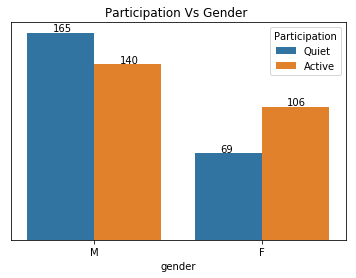

In [11]:
result=[]
average = np.mean(student_data['raisedhands'])

for k in student_data['raisedhands']:
    if k > average :
        result.append('Active')
    else:
        result.append('Quiet')

student_data['Participation'] = result

#student_data = student_data.drop('raisedhands',axis=1)

plt.title("Participation Vs Gender ")
bar = sns.countplot(hue='Participation',x='gender',data=student_data)
plt.ylabel("")
plt.yticks([])
for p in bar.patches:
    bar.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))

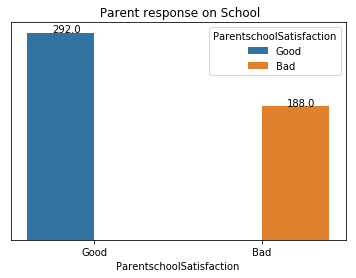

In [12]:
plt.title(" Parent response on School")

bar = sns.countplot(hue='ParentschoolSatisfaction',x='ParentschoolSatisfaction',data=student_data)
plt.ylabel("")
plt.yticks([])

for p in bar.patches:
    bar.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [14]:
label = LabelEncoder()
Features = pd.DataFrame()
Features['Gender'] = label.fit_transform(student_data['gender'])
Features['StageID'] = label.fit_transform(student_data['StageID'])
Features['Raisedhands'] = label.fit_transform(student_data['raisedhands'])
Features['Discussion'] = label.fit_transform(student_data['Discussion'])
Features['StudentAbsenceDays'] = label.fit_transform(student_data['StudentAbsenceDays'])

Target = label.fit_transform(student_data['Result'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2)

In [16]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
log_model_accuracy = accuracy_score(y_test,y_pred)
print("Logistic Model Acuracy = ",log_model_accuracy)

Logistic Model Acuracy =  0.9166666666666666
